In [5]:
# from keras.models import load_model
# model = load_model("eiffel2.h5")
# print ("model loaded, hic")

which_demo = "eiffel" 
# which_demo = "landmark"

# model reconstruction from JSON:
from keras.models import model_from_json
import json
with open(which_demo + '_model.json') as f:
    json_string = json.load(f)
model = model_from_json(json_string)

from keras.models import load_model
model.load_weights(which_demo + '_weights.h5')

print("loaded model!")


loaded model!


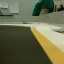

'left'

In [ ]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
import EngineV3 as engine
from IPython import display 
import cv2
import numpy as np
import PIL.Image 
from TawnTime import FPSTimer
from TawnCam import PiCamera
import time

timer = FPSTimer()
camera = PiCamera(image_w=64, image_h=64, image_d=3, framerate=10)

engine.set_speed(50)

try:
    while True:
        
            frame = camera.run()
            timer.on_frame()
            frame = cv2.flip(frame, -1)

            #ask NN to predict control from image
            pred = model.predict(frame[None, :, :, :])

            #get values from pred array
            iArrowDir = np.argmax(pred[0])

            if iArrowDir == 0:
                command = 'up' 
                engine.go_forward()
            elif iArrowDir == 1:
                command = 'left'
                engine.left()
                time.sleep(.1)
                engine.go_forward()
            elif iArrowDir == 2:
                command = 'right' 
                engine.right()
                time.sleep(.1)
                engine.go_forward()
            elif iArrowDir == 3:
                command = "eiffel"
                engine.stop()
            elif iArrowDir == 4:
                command = "chicago"
                engine.stop()
            elif iArrowDir == 5:
                command = "start"
                engine.stop()
                
            display.clear_output(wait=True)
            display.display(PIL.Image.fromarray(frame))
            display.display(command)
    
finally:
    engine.stop()
    camera.shutdown()